# Classification based on age and income by KMeans


### Reading of datasets

In [119]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [120]:
df = pd.read_excel('Income.xlsx')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


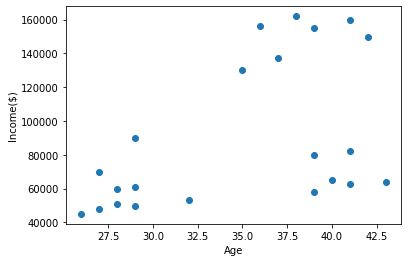

In [121]:
plt.scatter(df['Age'],df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.show()


In [122]:
km = KMeans(n_clusters=3)
y_predict = km.fit_predict(df[['Age','Income($)']])
y_predict

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [123]:
df['cluster'] = y_predict
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [124]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

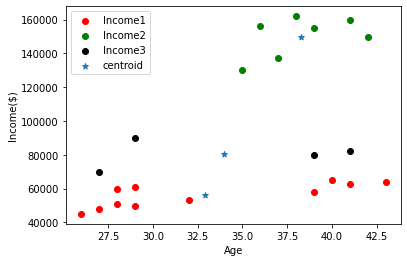

In [125]:
df1 = df[df['cluster']==0]
df2 = df[df['cluster']==1]
df3 = df[df['cluster']==2]

plt.scatter(df1['Age'],df1['Income($)'], color='Red', label='Income1')
plt.scatter(df2['Age'],df2['Income($)'], color='Green', label='Income2')
plt.scatter(df3['Age'],df3['Income($)'], color='Black', label='Income3')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], marker='*', label='centroid')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

### Preprocessing using MicMaxScalar


In [137]:
Scalar = MinMaxScaler()

Scalar.fit(df[['Income($)']])
df['Income($)'] = Scalar.transform(df[['Income($)']])

Scalar.fit(df[['Age']])
df['Age'] = Scalar.transform(df[['Age']])

In [138]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


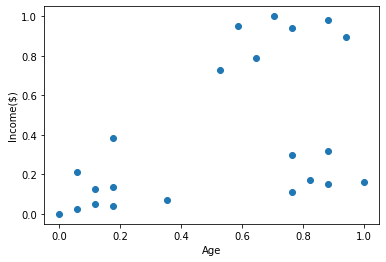

In [139]:
plt.scatter(df['Age'],df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.show()

In [140]:
km = KMeans(n_clusters=3)
y_predict = km.fit_predict(df[['Age','Income($)']])
y_predict

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [141]:
df['cluster'] = y_predict
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [142]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

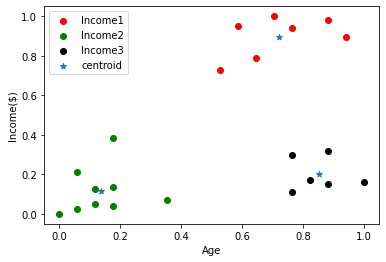

In [143]:
df1 = df[df['cluster']==0]
df2 = df[df['cluster']==1]
df3 = df[df['cluster']==2]

plt.scatter(df1['Age'],df1['Income($)'], color='Red', label='Income1')
plt.scatter(df2['Age'],df2['Income($)'], color='Green', label='Income2')
plt.scatter(df3['Age'],df3['Income($)'], color='Black', label='Income3')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], marker='*', label='centroid')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

### Elbow Plot

In [144]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

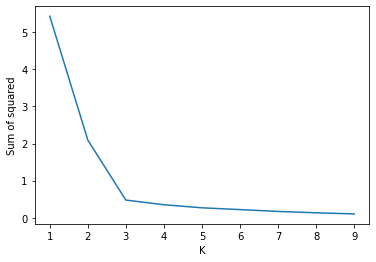

In [145]:
plt.xlabel('K')
plt.ylabel('Sum of squared')
plt.plot(k_rng,sse)

In [ ]:
#### The value of K found using elbow plot is K = 3